In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand 
import sklearn as skl
import geopandas as gpd
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator

from matplotlib.colors import ListedColormap

In [69]:
nathpi = pd.read_excel('../../Desktop/ISDS 577 Capstone Project/datasets/HPI_AT_BDL_national.xlsx')
nathpi.head(10)

,HPI for nation (All-Transactions Index)\nExperimental Indexes Showing Cumulative (Nominal) Annual Appreciation,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,* These annual national indexes should be cons...,NaN,NaN,NaN,NaN
2,"** For tracking and feedback purposes, please ...",NaN,NaN,NaN,NaN
3,"Last updated: March 26, 2024.",NaN,NaN,NaN,NaN
4,Not Seasonally Adjusted (NSA),NaN,NaN,NaN,NaN
5,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
6,1975,.,100.00,32.59,24.36
7,1976,8.14,108.14,35.25,26.34
8,1977,16.11,125.56,40.92,30.59
9,1978,16.13,145.81,47.53,35.52


In [70]:
fir = pd.read_csv('../../Desktop/ISDS 577 Capstone Project/datasets/BOGZ1FL072052006Q.csv')
fir

,DATE,BOGZ1FL072052006Q
0,1954-07-01,1.07
1,1954-10-01,1.28
2,1955-01-01,1.35
3,1955-04-01,1.64
4,1955-07-01,2.18
...,...,...
273,2022-10-01,4.10
274,2023-01-01,4.65
275,2023-04-01,5.08
276,2023-07-01,5.33


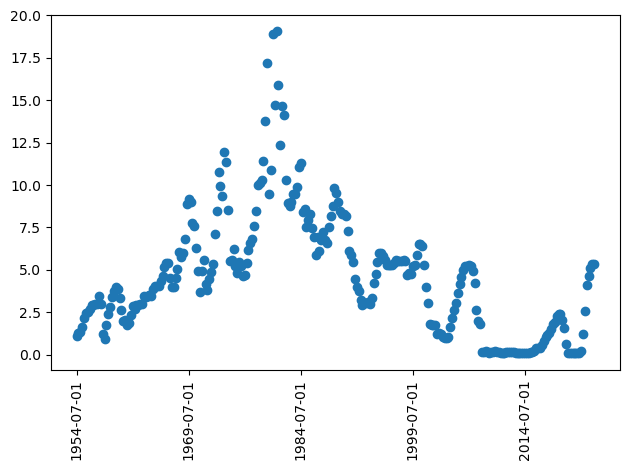

In [71]:
#Plot of Date vs Financial Rates
ax = plt.figure().gca()
plt.scatter(fir['DATE'], fir['BOGZ1FL072052006Q'])
ax.xaxis.set_major_locator(MaxNLocator(nbins=6)) 
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

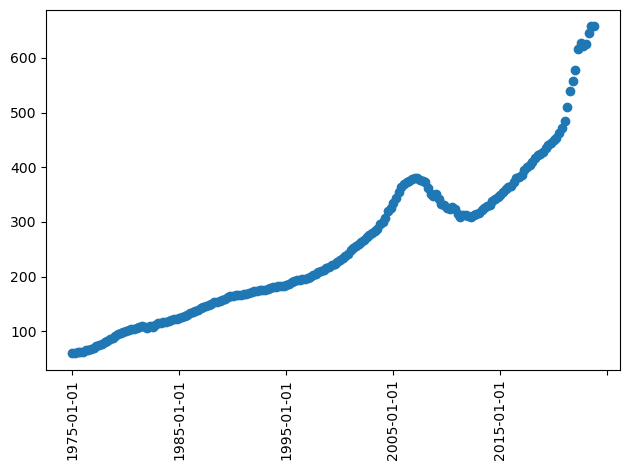

In [72]:
#Plot: Data vs HPI 
ax = plt.figure().gca()
plt.scatter( ushpi['DATE'],ushpi['USSTHPI'] )
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Reduce the number of labels
plt.xticks(rotation=90)  # Rotate labels to 45 degrees
plt.tight_layout()  # This will help to fit everything into the figure neatly
plt.show()
#shows increase in hpi over the years

In [73]:
ushpi = pd.read_csv('../../Desktop/ISDS 577 Capstone Project/datasets/USSTHPI.csv')
ushpi

,DATE,USSTHPI
0,1975-01-01,59.88
1,1975-04-01,60.76
2,1975-07-01,61.17
3,1975-10-01,62.22
4,1976-01-01,62.85
...,...,...
191,2022-10-01,622.34
192,2023-01-01,625.68
193,2023-04-01,645.14
194,2023-07-01,657.42


In [74]:
usfir = pd.merge(fir, ushpi, on = 'DATE')
usfir

,DATE,BOGZ1FL072052006Q,USSTHPI
0,1975-01-01,5.54,59.88
1,1975-04-01,5.55,60.76
2,1975-07-01,6.24,61.17
3,1975-10-01,5.20,62.22
4,1976-01-01,4.84,62.85
...,...,...,...
191,2022-10-01,4.10,622.34
192,2023-01-01,4.65,625.68
193,2023-04-01,5.08,645.14
194,2023-07-01,5.33,657.42


In [75]:
corr_mat = usfir.drop('DATE', axis = 1).corr()

print(corr_mat)

                   BOGZ1FL072052006Q   USSTHPI
BOGZ1FL072052006Q           1.000000 -0.645353
USSTHPI                    -0.645353  1.000000


In [76]:
ccoef = corr_mat.loc['BOGZ1FL072052006Q', 'USSTHPI']
ccoef

-0.6453530782661293

In [77]:
X = usfir['BOGZ1FL072052006Q'].values.reshape(-1,1)
y = usfir['USSTHPI']

In [78]:
#split into training and temp datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [79]:
#split temp testing dataset into test and valid
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [86]:

# Assuming X_train and y_train are already defined and correctly formatted
# Step 2: Add a constant to the input features
X_sm = sm.add_constant(X)  # Adds a constant term to the predictor

# Step 3: Fit the OLS model
model = sm.OLS(y, X_sm)
results = model.fit()

# Step 4: Print the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                USSTHPI   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     138.5
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.79e-24
Time:                        21:40:41   Log-Likelihood:                -1193.7
No. Observations:                 196   AIC:                             2391.
Df Residuals:                     194   BIC:                             2398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        362.7634     11.887     30.517      0.0

In [87]:

# Assuming X_train and y_train are already defined and correctly formatted
# Step 2: Add a constant to the input features
X_train_sm = sm.add_constant(X_train)  # Adds a constant term to the predictor

# Step 3: Fit the OLS model
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Step 4: Print the summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                USSTHPI   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     59.37
Date:                Tue, 07 May 2024   Prob (F-statistic):           5.05e-12
Time:                        21:40:45   Log-Likelihood:                -725.00
No. Observations:                 117   AIC:                             1454.
Df Residuals:                     115   BIC:                             1460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        364.7452     17.916     20.359      0.0

In [81]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)



In [82]:
# Train the model
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [83]:
# Making predictions
y_test_pred = knn_regressor.predict(X_test)

In [40]:
# Evaluating the model
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 7118.955921899998, RMSE: 84.37390545601168


In [41]:
yr2 = r2_score(y_test, y_test_pred)
print(f'Test R^2: {yr2}')


Test R^2: 0.6333788470606174


In [35]:
y_pred_val = knn_regressor.predict(X_val)

In [36]:
valmse = mean_squared_error(y_val, y_pred_val)
print(f'Validation MSE: {valmse}')


Validation MSE: 6473.727981435895


In [37]:
valrmse = np.sqrt(valmse)
print(f'Validation RMSE:{valrmse}')

Validation RMSE:80.45948037015835


In [38]:
yvr2 = r2_score(y_val, y_pred_val)
print(f'Validation R^2: {yvr2}')


Validation R^2: 0.5254239802883736


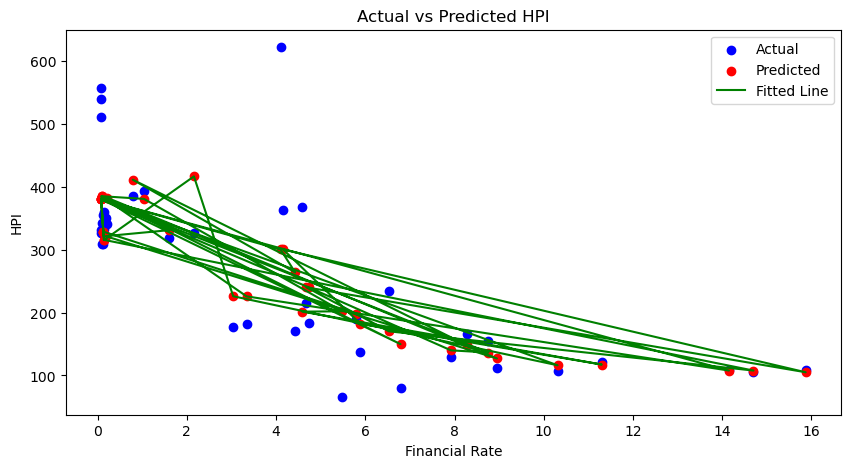

In [59]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_test_pred, color='red', label='Predicted')
plt.plot(X_test, y_test_pred, color='green', label='Fitted Line') 
plt.title('Actual vs Predicted HPI')
plt.xlabel('Financial Rate')
plt.ylabel('HPI')
plt.legend()
plt.show()

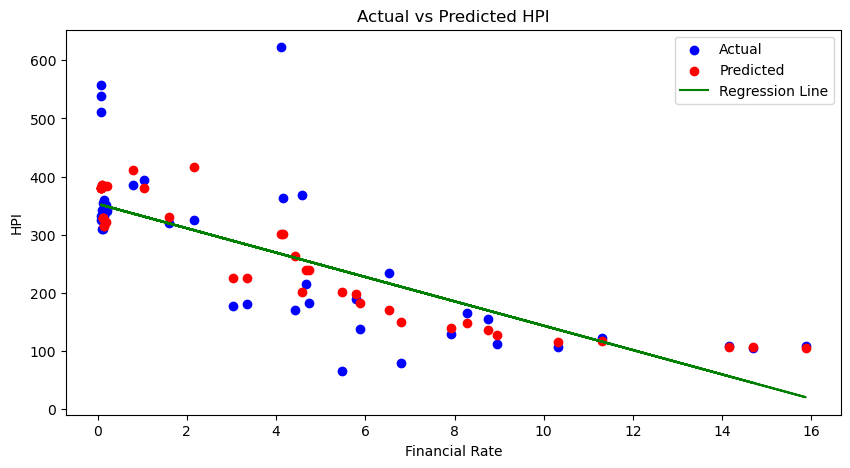

In [60]:
X_test_np = np.array(X_test).flatten()[:, np.newaxis]  # Adding new axis for single feature
y_test_pred_np = np.array(y_test_pred).flatten()

# Calculate coefficients for the regression line
a, b = np.polyfit(X_test_np.flatten(), y_test_pred_np, 1)  # Fit a 1st degree polynomial

# Create the plot
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_test_pred, color='red', label='Predicted')

# Add regression line
plt.plot(X_test_np, a * X_test_np + b, color='green', label='Regression Line')  

plt.title('Actual vs Predicted HPI')
plt.xlabel('Financial Rate')
plt.ylabel('HPI')
plt.legend()
plt.show()

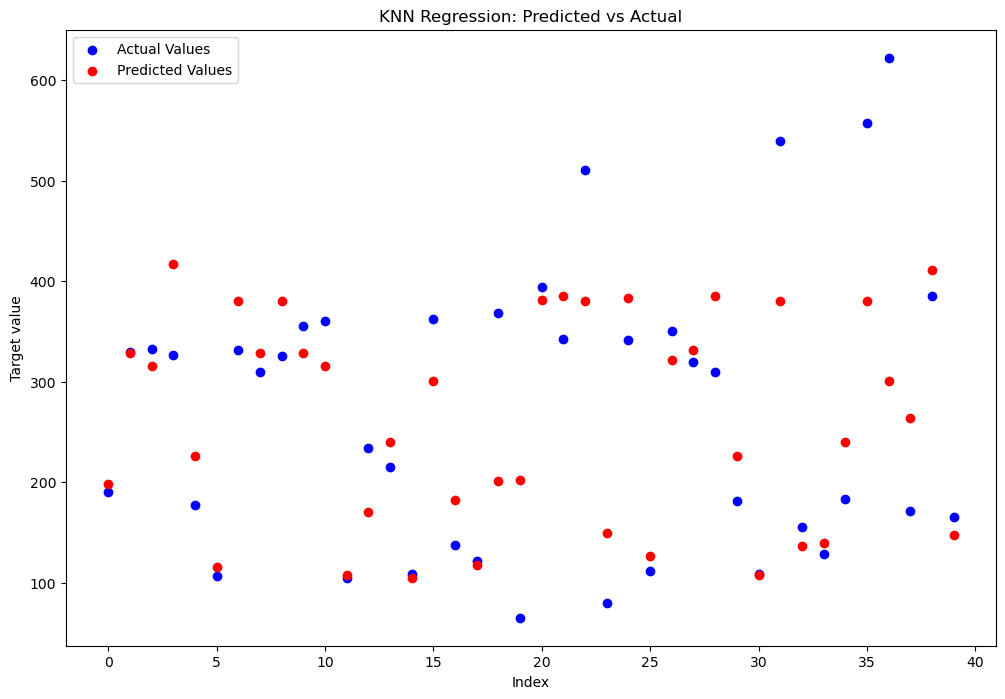

In [23]:
plt.figure(figsize=(12, 8))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Target value')
plt.legend()
plt.title('KNN Regression: Predicted vs Actual')
plt.show()

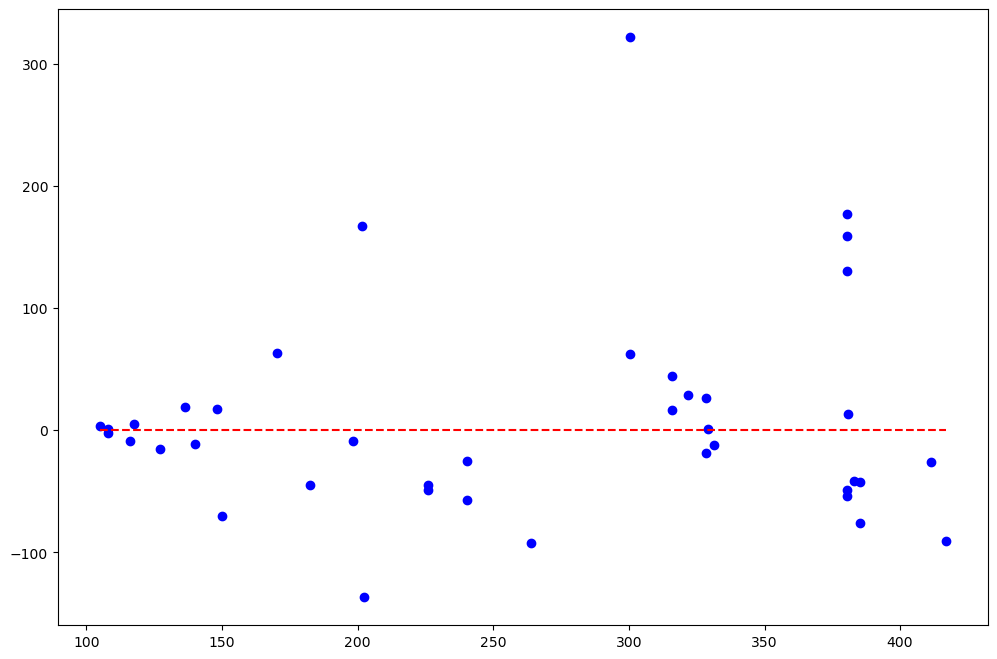

In [24]:
residuals = np.array(y_test) - np.array(y_test_pred)
plt.figure(figsize=(12, 8))
plt.scatter(y_test_pred, residuals, color = 'blue')
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), colors='red', linestyles='--')
plt.show()


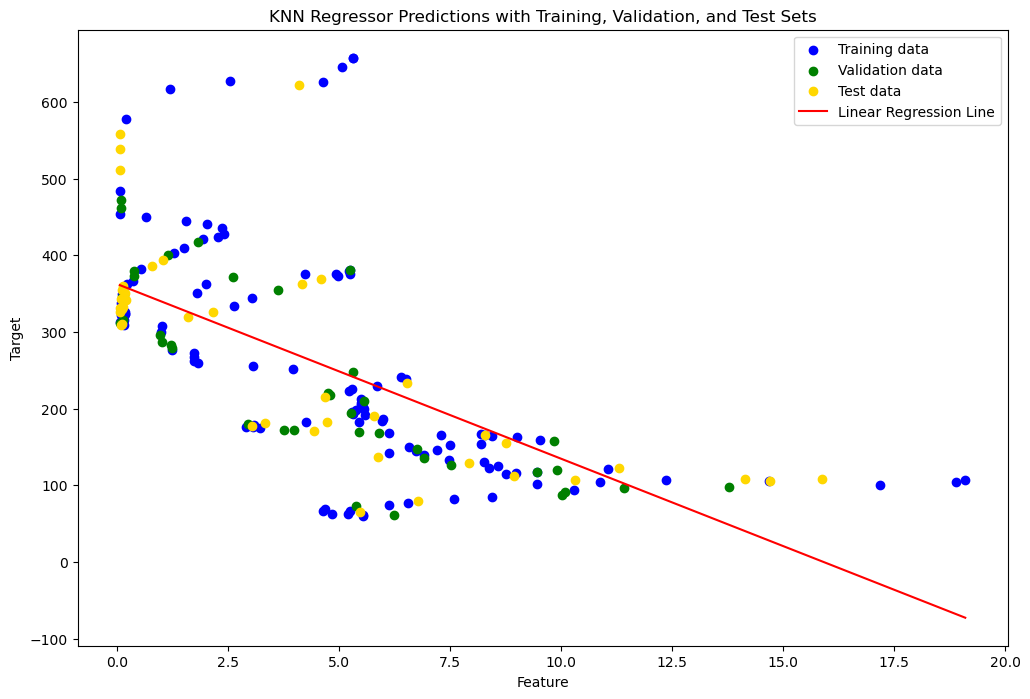

In [61]:
X_all = np.concatenate([X_train, X_val, X_test])
y_all = np.concatenate([y_train, y_val, y_test])

# Ensure data is in the correct shape for regression
X_all = X_all.reshape(-1, 1)  # Necessary if X_all is a 1D array

model = LinearRegression()
model.fit(X_all, y_all)
# Create data for the regression line
x_line = np.linspace(X_all.min(), X_all.max(), 300).reshape(-1, 1)
y_line = model.predict(x_line)

# Step 3: Plot the data and the regression line
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_val, y_val, color='green', label='Validation data')
plt.scatter(X_test, y_test, color='gold', label='Test data')
plt.plot(x_line, y_line, color='red', label='Linear Regression Line')
plt.xlabel('Financial Rate')
plt.ylabel('HPI')
plt.legend()
plt.title('KNN Regressor Predictions with Training, Validation, and Test Sets')
plt.show()

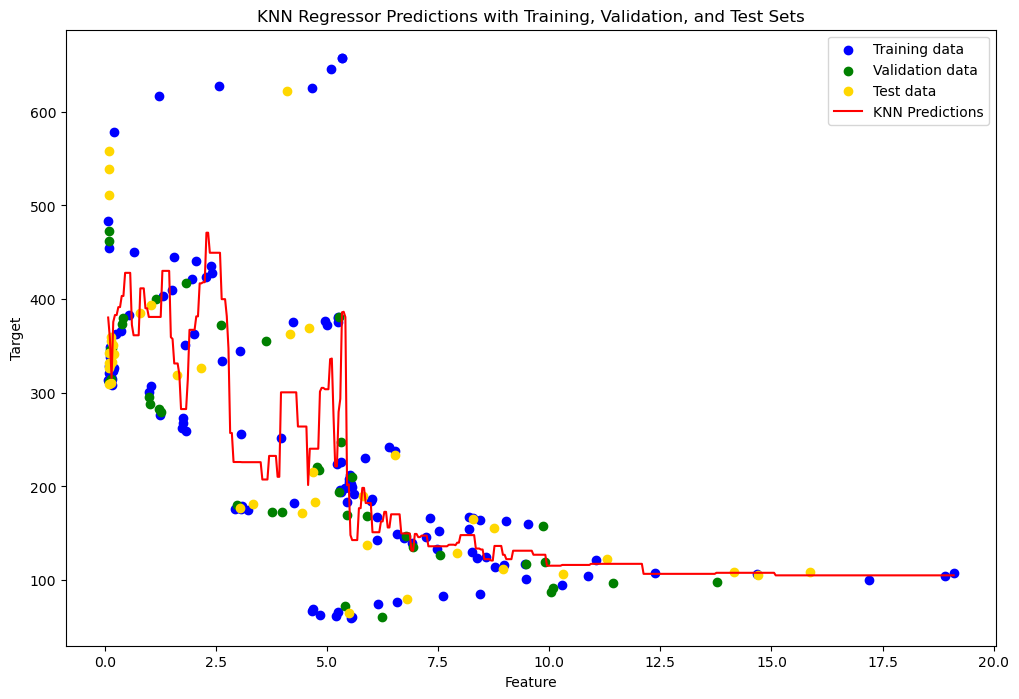

In [62]:
X_range = np.linspace(np.min(X_all), np.max(X_all), 500).reshape(-1, 1)

y_range_pred = knn_regressor.predict(X_range)

plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_val, y_val, color='green', label='Validation data')
plt.scatter(X_test, y_test, color='gold', label='Test data')
plt.plot(X_range, y_range_pred, color='red', label='KNN Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('KNN Regressor Predictions with Training, Validation, and Test Sets')
plt.show()

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
#Test
lry_val = lr.predict(X_val)
vlrmse = mean_squared_error(y_val, lry_val)
vlrrmse = np.sqrt(vlrmse)
vlr_r2 = r2_score(y_val, lry_val)
print(f'MSE: {vlrmse}, RMSE: {vlrrmse}')
print(f'Validation R^2: {vlr_r2}')

MSE: 5486.640593420541, RMSE: 74.07186100956652
Validation R^2: 0.5977853777791542


In [34]:
#Test
lry_pred = lr.predict(X_test)
lrmse = mean_squared_error(y_test, lry_pred)
lrrmse = np.sqrt(lrmse)
lr_r2 = r2_score(y_test, lry_pred)
print(f'MSE: {lrmse}, RMSE: {lrrmse}')
print(f'Test R^2: {lr_r2}')


MSE: 9408.790895025624, RMSE: 96.9989221333187
Test R^2: 0.5154539789903317


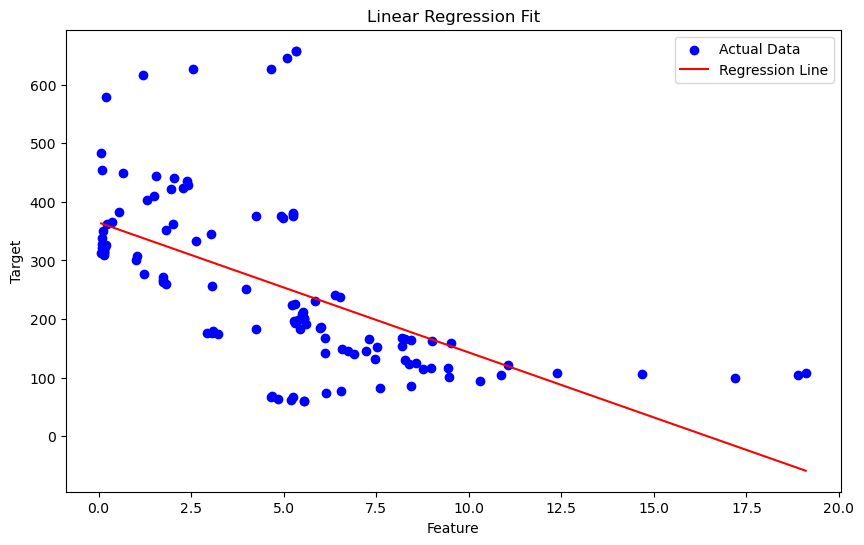

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training datasets
# Create a range of values for plotting the regression line
X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# Predict y values for the defined range
y_range_pred = lr.predict(X_range)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Data')
plt.plot(X_range, y_range_pred, color='red', label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

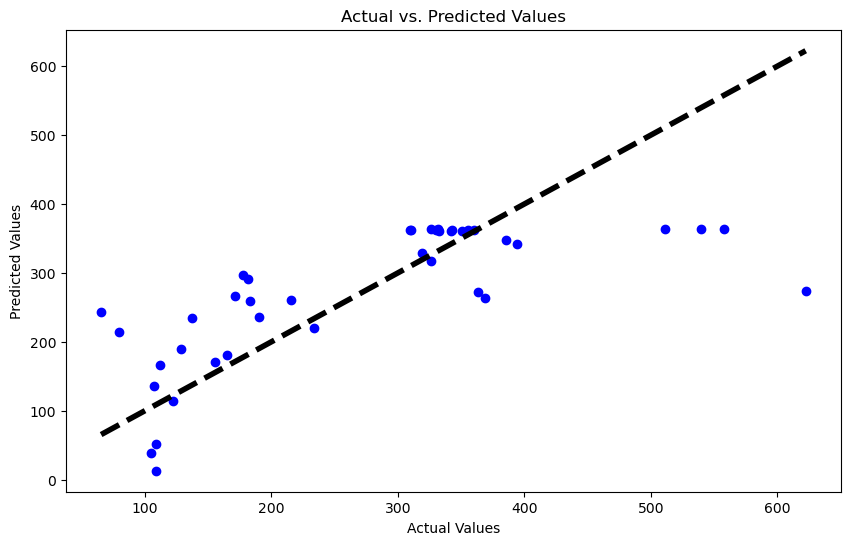

In [64]:
# Assuming lry_pred are your predicted values from the test dataset
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lry_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [57]:
mzvi = pd.read_csv('https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1712203671')
mzvi

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
0,102001,0,United States,country,NaN,121733.968492,121948.137568,122213.738756,122783.401170,123439.014311,...,344800.668571,346556.265650,348185.384600,349416.191393,350337.210517,350989.680382,351422.680045,351853.570519,352643.211082,354178.895503
1,394913,1,"New York, NY",msa,NY,216150.554045,217069.071943,217996.096972,219874.608396,221819.872028,...,616112.961817,619715.298726,623014.744681,625741.617408,628088.794927,630401.202991,633164.954066,636049.823869,640088.289589,645484.992262
2,753899,2,"Los Angeles, CA",msa,CA,231247.002941,232107.535195,233253.755951,235534.350213,238028.605365,...,897954.530396,909676.914946,923859.988980,938180.569927,950095.413757,959061.991630,964692.569762,964853.271329,961763.207758,960594.484153
3,394463,3,"Chicago, IL",msa,IL,152496.683972,152637.851478,152906.707478,153575.554394,154380.096783,...,299233.179363,301772.486784,304224.279696,306051.676425,307412.217507,308323.993034,308956.619133,309614.644858,310995.446505,313395.694815
4,394514,4,"Dallas, TX",msa,TX,127626.561330,127683.406646,127748.756157,127918.461971,128142.214440,...,374590.235758,375581.683736,376517.216607,376938.395031,377054.586318,376913.810144,376583.049504,376605.012932,377093.204415,378265.329163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,122341.990495,121979.342184,122202.899099,121858.586063,120280.452008,118141.415733,116157.016218,114511.046315,113727.511519,113841.431110
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,388548.911096,390066.362552,389655.680836,387709.630281,384340.220254,381540.546636,379065.008471,378838.948775,378957.082858,380629.487002
892,753874,937,"Craig, CO",msa,CO,96469.915077,96716.595396,97175.849530,97829.869837,98589.886205,...,270355.356011,273216.199422,275434.036330,276666.136965,277879.566964,278593.011685,278545.378574,277796.576125,277729.308511,278181.492920
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,97265.141908,96704.485609,95650.890704,94638.705265,93540.727179,92016.921183,90661.109218,89930.546908,89980.364141,90630.434485


In [58]:
sortm = mzvi.sort_values(by='StateName', ascending = True)
sortm

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
136,394327,139,"Anchorage, AK",msa,AK,134990.166884,135187.750651,135395.481834,135679.940989,136065.894139,...,366764.272073,368556.109617,370144.710594,370706.686485,370807.555788,370218.621661,369573.658115,369801.420959,370615.172694,371759.641085
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,388548.911096,390066.362552,389655.680836,387709.630281,384340.220254,381540.546636,379065.008471,378838.948775,378957.082858,380629.487002
774,394730,802,"Juneau, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,463602.279192,465645.349454,468452.877998,469144.185483,469184.164495,467954.279666,467406.481394,469198.315306,472160.155864,475656.844606
395,394580,407,"Fairbanks, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,286217.799390,287549.806975,288235.667311,287544.260325,286133.790001,284871.779859,283658.008910,284122.421367,286073.792640,288925.740022
284,394598,292,"Florence, AL",msa,AL,NaN,NaN,NaN,NaN,NaN,...,195591.535619,196544.138371,196829.643575,196820.818002,197106.261399,198029.722954,198933.638210,199333.874388,199584.190760,200669.539681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,394631,531,"Gillette, WY",msa,WY,NaN,NaN,NaN,NaN,NaN,...,305885.335577,307999.589118,310166.473080,311571.236099,312443.895365,312262.188457,311520.048364,310943.542429,311387.048206,312486.217794
441,394445,454,"Casper, WY",msa,WY,NaN,NaN,NaN,NaN,NaN,...,274574.620681,276010.874019,277750.203461,279304.187879,280953.687287,281782.149123,282010.825823,282160.584500,282976.072732,284699.338789
785,395093,815,"Sheridan, WY",msa,WY,NaN,NaN,NaN,NaN,NaN,...,420228.699171,422451.405343,423008.156612,423066.569487,421630.439195,419626.251607,416594.866157,414629.484835,413093.438017,413518.095854
380,394462,391,"Cheyenne, WY",msa,WY,NaN,NaN,NaN,NaN,NaN,...,359749.038721,361161.311066,362031.397469,362347.337790,363626.436285,364119.111343,363746.202589,362280.815739,361845.524356,362801.305828


In [59]:
ca = mzvi[mzvi['StateName'] == 'CA']
ca

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
2,753899,2,"Los Angeles, CA",msa,CA,231247.002941,232107.535195,233253.755951,235534.350213,238028.605365,...,8.979545e+05,9.096769e+05,9.238600e+05,9.381806e+05,9.500954e+05,9.590620e+05,9.646926e+05,9.648533e+05,9.617632e+05,9.605945e+05
12,395057,12,"San Francisco, CA",msa,CA,303730.577545,304918.710301,306729.531020,311642.049319,318412.374117,...,1.149854e+06,1.157050e+06,1.165277e+06,1.173134e+06,1.178588e+06,1.180104e+06,1.178016e+06,1.173391e+06,1.170854e+06,1.176322e+06
13,395025,13,"Riverside, CA",msa,CA,137492.411929,138054.408395,138598.348234,139712.406748,140811.805421,...,5.522144e+05,5.558838e+05,5.600560e+05,5.641298e+05,5.682390e+05,5.717598e+05,5.749520e+05,5.769508e+05,5.783187e+05,5.798590e+05
17,395056,17,"San Diego, CA",msa,CA,221358.332142,222234.715915,223297.023303,225702.348039,228300.539011,...,8.762716e+05,8.878725e+05,9.000080e+05,9.117333e+05,9.213531e+05,9.279735e+05,9.314667e+05,9.338106e+05,9.384948e+05,9.469760e+05
26,395045,26,"Sacramento, CA",msa,CA,169403.541941,169860.073927,170498.592848,171757.879283,173253.391953,...,5.653806e+05,5.687120e+05,5.724884e+05,5.750674e+05,5.765608e+05,5.772025e+05,5.775394e+05,5.776298e+05,5.784010e+05,5.808036e+05
35,395059,36,"San Jose, CA",msa,CA,390386.850586,392398.870422,395429.941500,403638.299681,412244.260332,...,1.481332e+06,1.501807e+06,1.528701e+06,1.558053e+06,1.583939e+06,1.604402e+06,1.617711e+06,1.617959e+06,1.613260e+06,1.614185e+06
56,394619,57,"Fresno, CA",msa,CA,112681.169086,112763.389132,111822.929388,110962.670564,110041.980025,...,3.779560e+05,3.803995e+05,3.830130e+05,3.851462e+05,3.863896e+05,3.870163e+05,3.876875e+05,3.890298e+05,3.908359e+05,3.931382e+05
62,394357,63,"Bakersfield, CA",msa,CA,98171.866707,98155.455645,97350.574334,96516.505034,95788.220419,...,3.313091e+05,3.342137e+05,3.370038e+05,3.390108e+05,3.403098e+05,3.413575e+05,3.424906e+05,3.438213e+05,3.452876e+05,3.470794e+05
70,394952,71,"Oxnard, CA",msa,CA,263896.815515,264608.600480,265634.305244,267655.476449,269885.968628,...,8.254110e+05,8.329873e+05,8.412198e+05,8.487758e+05,8.543052e+05,8.577481e+05,8.597187e+05,8.609984e+05,8.630846e+05,8.672735e+05
75,395134,77,"Stockton, CA",msa,CA,162241.378709,161450.544279,161357.879907,161394.107463,162426.285564,...,5.260481e+05,5.290358e+05,5.315343e+05,5.330372e+05,5.341279e+05,5.350255e+05,5.360460e+05,5.367283e+05,5.378911e+05,5.401466e+05


In [60]:
new_mzvi = mzvi.dropna()
new_mzvi

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
1,394913,1,"New York, NY",msa,NY,216150.554045,217069.071943,217996.096972,219874.608396,221819.872028,...,6.161130e+05,6.197153e+05,6.230147e+05,6.257416e+05,6.280888e+05,6.304012e+05,6.331650e+05,6.360498e+05,6.400883e+05,6.454850e+05
2,753899,2,"Los Angeles, CA",msa,CA,231247.002941,232107.535195,233253.755951,235534.350213,238028.605365,...,8.979545e+05,9.096769e+05,9.238600e+05,9.381806e+05,9.500954e+05,9.590620e+05,9.646926e+05,9.648533e+05,9.617632e+05,9.605945e+05
3,394463,3,"Chicago, IL",msa,IL,152496.683972,152637.851478,152906.707478,153575.554394,154380.096783,...,2.992332e+05,3.017725e+05,3.042243e+05,3.060517e+05,3.074122e+05,3.083240e+05,3.089566e+05,3.096146e+05,3.109954e+05,3.133957e+05
5,394692,5,"Houston, TX",msa,TX,122445.062780,122467.870536,122382.378585,122433.480611,122480.620592,...,3.051049e+05,3.060385e+05,3.069239e+05,3.072847e+05,3.073106e+05,3.070231e+05,3.066058e+05,3.065998e+05,3.069796e+05,3.079705e+05
6,395209,6,"Washington, DC",msa,VA,182904.092730,183052.807931,183326.899889,183947.522866,184890.975294,...,5.460719e+05,5.494953e+05,5.522737e+05,5.540405e+05,5.551975e+05,5.558660e+05,5.564363e+05,5.568647e+05,5.583320e+05,5.614195e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,394337,896,"Arkadelphia, AR",msa,AR,72232.865305,71981.927417,72361.039333,72899.174374,73799.161780,...,1.427307e+05,1.429431e+05,1.419392e+05,1.409411e+05,1.401399e+05,1.400566e+05,1.401301e+05,1.399847e+05,1.401850e+05,1.408751e+05
866,394498,905,"Cordele, GA",msa,GA,65859.329744,66076.229157,66202.578829,66551.122513,66945.594923,...,1.253830e+05,1.265777e+05,1.272153e+05,1.278362e+05,1.277921e+05,1.280460e+05,1.277815e+05,1.274328e+05,1.266897e+05,1.267839e+05
871,753925,910,"Vineyard Haven, MA",msa,MA,340941.320399,342376.545305,343704.582906,347258.379025,351581.174132,...,1.441813e+06,1.460184e+06,1.472983e+06,1.481353e+06,1.488369e+06,1.495878e+06,1.502783e+06,1.506170e+06,1.509775e+06,1.518776e+06
879,394594,923,"Fitzgerald, GA",msa,GA,54535.713877,54304.703048,54216.282380,53964.055041,53889.896783,...,1.076917e+05,1.086252e+05,1.090210e+05,1.089746e+05,1.083570e+05,1.077144e+05,1.073317e+05,1.074619e+05,1.080525e+05,1.092235e+05


In [61]:
nusortm = new_mzvi.sort_values(by='StateName', ascending = True)
nusortm

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
140,394875,143,"Montgomery, AL",msa,AL,112312.445497,112393.812088,112436.122996,112574.652555,112760.686976,...,187837.194068,188536.638270,188548.876101,188445.043099,188539.384816,189092.203246,189399.679503,189556.723110,189744.817016,190386.592225
184,395171,188,"Tuscaloosa, AL",msa,AL,103268.767286,103415.550171,103666.254215,104020.443589,104325.980296,...,215460.656330,215788.228668,215727.598422,215866.944432,215792.298478,215799.447227,215449.055635,214710.731463,214083.664617,214305.359774
50,394388,51,"Birmingham, AL",msa,AL,112371.296453,112638.246112,112757.948963,112922.605616,113375.165456,...,253329.960843,254056.465183,254261.084139,254074.045227,253650.636455,253110.394655,252552.616804,252217.030280,252047.017061,252448.259399
124,394870,127,"Mobile, AL",msa,AL,89136.873980,89312.910525,89524.552965,89952.262636,90567.821311,...,183931.818811,184809.248712,184905.395244,184566.433882,184353.024037,184463.164191,184894.971767,185246.816251,185989.709382,187328.352422
198,394519,203,"Daphne, AL",msa,AL,134825.676335,135036.925479,135273.838951,135744.759410,136166.634079,...,375193.385131,377074.967627,377748.334363,377242.511227,376654.963944,376251.961062,375738.313468,375459.924904,375638.514439,376754.312593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,394862,41,"Milwaukee, WI",msa,WI,142759.566193,142820.741779,143038.921981,143334.224276,143716.674165,...,324155.036605,326394.883570,328485.023256,330110.136435,331389.969826,332139.813942,332522.782141,332959.812013,334327.900859,337202.213006
492,394825,507,"Marinette, WI",msa,WI,71827.218148,72071.969990,72253.796255,72464.787023,72760.522766,...,167849.388221,168930.964563,169734.763386,170630.592311,171142.931478,170913.462564,170188.274207,169001.327430,168764.936869,169610.773682
85,394816,88,"Madison, WI",msa,WI,146507.610255,146342.099663,146451.821109,146507.824301,147016.402253,...,385358.509802,387134.936415,388764.274715,390619.093426,391830.245473,392554.958935,392632.996501,393331.201819,395268.029603,398935.696005
406,394469,418,"Clarksburg, WV",msa,WV,66541.242749,66637.307262,66761.793886,66931.602466,67111.419046,...,149237.425469,150448.409660,150960.643782,150808.755170,150369.041619,150002.766549,149815.941129,149817.748711,150093.290372,150900.990301


In [62]:
nuca = new_mzvi[new_mzvi['StateName'] == 'CA']
nuca

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
2,753899,2,"Los Angeles, CA",msa,CA,231247.002941,232107.535195,233253.755951,235534.350213,238028.605365,...,8.979545e+05,9.096769e+05,9.238600e+05,9.381806e+05,9.500954e+05,9.590620e+05,9.646926e+05,9.648533e+05,9.617632e+05,9.605945e+05
12,395057,12,"San Francisco, CA",msa,CA,303730.577545,304918.710301,306729.531020,311642.049319,318412.374117,...,1.149854e+06,1.157050e+06,1.165277e+06,1.173134e+06,1.178588e+06,1.180104e+06,1.178016e+06,1.173391e+06,1.170854e+06,1.176322e+06
13,395025,13,"Riverside, CA",msa,CA,137492.411929,138054.408395,138598.348234,139712.406748,140811.805421,...,5.522144e+05,5.558838e+05,5.600560e+05,5.641298e+05,5.682390e+05,5.717598e+05,5.749520e+05,5.769508e+05,5.783187e+05,5.798590e+05
17,395056,17,"San Diego, CA",msa,CA,221358.332142,222234.715915,223297.023303,225702.348039,228300.539011,...,8.762716e+05,8.878725e+05,9.000080e+05,9.117333e+05,9.213531e+05,9.279735e+05,9.314667e+05,9.338106e+05,9.384948e+05,9.469760e+05
26,395045,26,"Sacramento, CA",msa,CA,169403.541941,169860.073927,170498.592848,171757.879283,173253.391953,...,5.653806e+05,5.687120e+05,5.724884e+05,5.750674e+05,5.765608e+05,5.772025e+05,5.775394e+05,5.776298e+05,5.784010e+05,5.808036e+05
56,394619,57,"Fresno, CA",msa,CA,112681.169086,112763.389132,111822.929388,110962.670564,110041.980025,...,3.779560e+05,3.803995e+05,3.830130e+05,3.851462e+05,3.863896e+05,3.870163e+05,3.876875e+05,3.890298e+05,3.908359e+05,3.931382e+05
62,394357,63,"Bakersfield, CA",msa,CA,98171.866707,98155.455645,97350.574334,96516.505034,95788.220419,...,3.313091e+05,3.342137e+05,3.370038e+05,3.390108e+05,3.403098e+05,3.413575e+05,3.424906e+05,3.438213e+05,3.452876e+05,3.470794e+05
70,394952,71,"Oxnard, CA",msa,CA,263896.815515,264608.600480,265634.305244,267655.476449,269885.968628,...,8.254110e+05,8.329873e+05,8.412198e+05,8.487758e+05,8.543052e+05,8.577481e+05,8.597187e+05,8.609984e+05,8.630846e+05,8.672735e+05
75,395134,77,"Stockton, CA",msa,CA,162241.378709,161450.544279,161357.879907,161394.107463,162426.285564,...,5.260481e+05,5.290358e+05,5.315343e+05,5.330372e+05,5.341279e+05,5.350255e+05,5.360460e+05,5.367283e+05,5.378911e+05,5.401466e+05
100,394871,103,"Modesto, CA",msa,CA,145379.958480,145626.488870,146088.751520,146105.351007,146046.040883,...,4.450071e+05,4.478928e+05,4.511084e+05,4.540082e+05,4.562710e+05,4.577812e+05,4.589870e+05,4.601622e+05,4.615994e+05,4.640769e+05


In [63]:
ames = pd.read_csv('../../Desktop/ISDS 577 Capstone Project/datasets/AmesHousing.csv')
ames.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [64]:
real = pd.read_csv('https://econdata.s3-us-west-2.amazonaws.com/Reports/Core/listing_weekly_core_aggregate_by_country.csv')
real

,week_end_date,geo_country,median_listing_price_yy,active_listing_count_yy,median_days_on_market_by_day_yy,median_days_on_market_yy,new_listing_count_yy,new_listing_share_yy,price_reduced_count_yy,price_reduced_share_yy
0,27-Apr-24,usa,-0.50%,33.30%,1,2.20%,10.40%,-0.70%,50.10%,1.00%
1,20-Apr-24,usa,-1.10%,31.70%,0,0.00%,13.50%,-0.40%,52.80%,1.10%
2,13-Apr-24,usa,0.00%,29.10%,0,0.00%,7.20%,-0.80%,46.00%,0.90%
3,6-Apr-24,usa,-0.10%,30.40%,-1,2.00%,30.10%,0.70%,61.30%,1.20%
4,30-Mar-24,usa,-0.60%,25.00%,0,0.00%,-7.80%,-1.70%,27.80%,0.50%
...,...,...,...,...,...,...,...,...,...,...
352,29-Jul-17,usa,8.10%,-9.90%,-6,-9.20%,0.60%,0.50%,3.50%,0.60%
353,22-Jul-17,usa,7.70%,-10.00%,-5,-7.80%,-0.10%,0.50%,4.30%,0.60%
354,15-Jul-17,usa,7.70%,-9.60%,-5,-7.80%,1.90%,0.60%,0.80%,0.40%
355,8-Jul-17,usa,7.70%,-10.40%,-4,-6.50%,-3.70%,0.30%,-2.90%,0.20%


In [65]:
#sb.pairplot(ames[['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath']])
#sb.pairplot(ames[['Half Bath', 'Bedroom AbvGr', 'SalePrice']])
#plt.show()
amess = ames[['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'SalePrice']]
amess

,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,SalePrice
0,1.0,0.0,1,0,3,215000
1,0.0,0.0,1,0,2,105000
2,0.0,0.0,1,1,3,172000
3,1.0,0.0,2,1,3,244000
4,0.0,0.0,2,1,3,189900
...,...,...,...,...,...,...
2925,1.0,0.0,1,0,3,142500
2926,1.0,0.0,1,0,2,131000
2927,0.0,1.0,1,0,3,132000
2928,1.0,0.0,1,0,2,170000


In [66]:
amess['Total Full Bath'] = amess['Bsmt Full Bath'] + amess['Full Bath']
amess['Total Half Bath'] = amess['Bsmt Half Bath'] + amess['Half Bath']
amess

/var/folders/1y/9l7hcb7130j6dxjcqf8v59k00000gn/T/ipykernel_71642/3692008403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amess['Total Full Bath'] = amess['Bsmt Full Bath'] + amess['Full Bath']
/var/folders/1y/9l7hcb7130j6dxjcqf8v59k00000gn/T/ipykernel_71642/3692008403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amess['Total Half Bath'] = amess['Bsmt Half Bath'] + amess['Half Bath']


,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,Total Full Bath,Total Half Bath
0,1.0,0.0,1,0,3,215000,2.0,0.0
1,0.0,0.0,1,0,2,105000,1.0,0.0
2,0.0,0.0,1,1,3,172000,1.0,1.0
3,1.0,0.0,2,1,3,244000,3.0,1.0
4,0.0,0.0,2,1,3,189900,2.0,1.0
...,...,...,...,...,...,...,...,...
2925,1.0,0.0,1,0,3,142500,2.0,0.0
2926,1.0,0.0,1,0,2,131000,2.0,0.0
2927,0.0,1.0,1,0,3,132000,1.0,1.0
2928,1.0,0.0,1,0,2,170000,2.0,0.0


In [67]:
amess['Half Bath'] = amess['Total Half Bath'] * 0.5
amess

/var/folders/1y/9l7hcb7130j6dxjcqf8v59k00000gn/T/ipykernel_71642/781954009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amess['Half Bath'] = amess['Total Half Bath'] * 0.5


,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,Total Full Bath,Total Half Bath
0,1.0,0.0,1,0.0,3,215000,2.0,0.0
1,0.0,0.0,1,0.0,2,105000,1.0,0.0
2,0.0,0.0,1,0.5,3,172000,1.0,1.0
3,1.0,0.0,2,0.5,3,244000,3.0,1.0
4,0.0,0.0,2,0.5,3,189900,2.0,1.0
...,...,...,...,...,...,...,...,...
2925,1.0,0.0,1,0.0,3,142500,2.0,0.0
2926,1.0,0.0,1,0.0,2,131000,2.0,0.0
2927,0.0,1.0,1,0.5,3,132000,1.0,1.0
2928,1.0,0.0,1,0.0,2,170000,2.0,0.0


In [68]:
amess['Total Bath'] = amess['Total Full Bath'] + amess['Half Bath']
amess

/var/folders/1y/9l7hcb7130j6dxjcqf8v59k00000gn/T/ipykernel_71642/2761580988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amess['Total Bath'] = amess['Total Full Bath'] + amess['Half Bath']


,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,Total Full Bath,Total Half Bath,Total Bath
0,1.0,0.0,1,0.0,3,215000,2.0,0.0,2.0
1,0.0,0.0,1,0.0,2,105000,1.0,0.0,1.0
2,0.0,0.0,1,0.5,3,172000,1.0,1.0,1.5
3,1.0,0.0,2,0.5,3,244000,3.0,1.0,3.5
4,0.0,0.0,2,0.5,3,189900,2.0,1.0,2.5
...,...,...,...,...,...,...,...,...,...
2925,1.0,0.0,1,0.0,3,142500,2.0,0.0,2.0
2926,1.0,0.0,1,0.0,2,131000,2.0,0.0,2.0
2927,0.0,1.0,1,0.5,3,132000,1.0,1.0,1.5
2928,1.0,0.0,1,0.0,2,170000,2.0,0.0,2.0


In [69]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [70]:
#split temp testing dataset into test and valid
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [71]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [72]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)


In [73]:
# Making predictions
y_test_pred = knn_regressor.predict(X_test)

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.